In [1]:
using Plots
using Statistics
using Polynomials
using DataFrames
using Interpolations
using Images
using TestImages

┌ Info: Recompiling stale cache file /home/mateusz/.julia/compiled/v1.0/Interpolations/VpKVx.ji for Interpolations [a98d9a8b-a2ab-59e6-89dd-64a1c18fca59]
└ @ Base loading.jl:1187
┌ Info: Recompiling stale cache file /home/mateusz/.julia/compiled/v1.0/Images/H8Vxc.ji for Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1187


# Sprawozdanie MOwNiT Laboratorium 5

## Zadanie 1
Własna implementacja interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny Lagrange'a.

### Wielomian $l_{k}$
$l_{k}$ to taki wielomian, który jest zależny od węzłów $x_{0}, x_{1}, \ldots, x_{n}$, ale nie zależy od wartości $y_{0}, y_{1}, \ldots, y_{n}$. Ma taką własność, że dla $x = x_{k}$: $l_{k}(x_{k}) = 1$, a dla pozostałych węzłów $i\neq kl_{k}:(x_{i}) = 0$. Wielomian ten ma postać:
$$l_{k} = \prod_{i=0,i\neq k}^{n} \frac{x-x_{i}}{x_{k} - x_{i}}$$

In [2]:
function lagrageBase(k,xs,x)
    product=1;
    for i in 1:length(xs)
        if(i!=k)
            product = product*((x-xs[i])/(xs[k]-xs[i]))
        end
    end
    product
end

lagrageBase (generic function with 1 method)

### Wielomian interpolacyjny Lagrange'a 
Na podstawie wielomianu $l_{k}$ można wyrazić wielomian interpolacyjny Lagrange'a $p(x)$ w postaci:

$$p(x) = \sum_{k=0}^{n} y_{k} l_{k}(x)$$

In [3]:
function lagrangeFit(xs, y)
    function lagrangeFitX(xs, y, x)
        sum = 0;
        for k in 1:length(xs)
            sum+=y[k]*lagrageBase(k,xs,x)
        end
        sum
    end
    x -> lagrangeFitX(xs,y,x)
end

lagrangeFit (generic function with 1 method)

### Testowanie rozwiązania 
Testowanie implementacji na wylosowanych węzłach interpolacji w wybranym przedziale. 
Wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji.

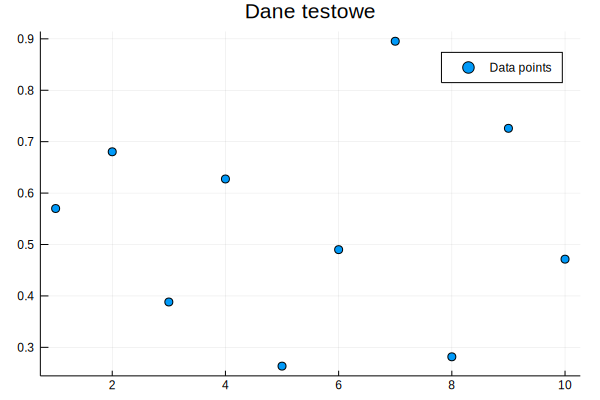

In [4]:
xs = 1:1:10
xsf=1:0.01:10
A = [rand() for x in xs]
scatter(xs,A, label="Data points", title="Dane testowe")

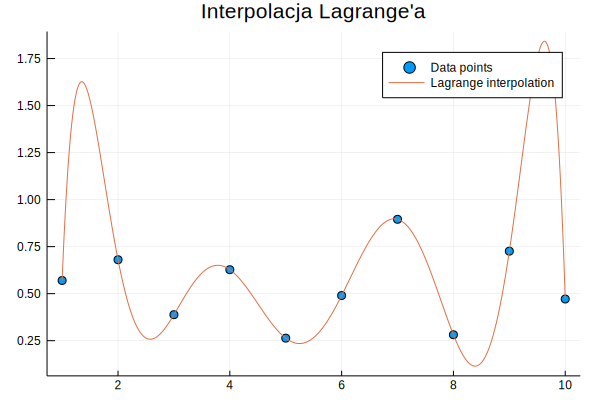

In [5]:
lF = lagrangeFit(xs, A)
B=[lF(x) for x in xsf]
plot!(xsf,B, label="Lagrange interpolation", title="Interpolacja Lagrange'a")

## Zadanie 2
Napisać własną implementację interpolacji wielomianowej stosując metodę ilorazów róznicowych

$P_n(x) = a_0 + a_1(x − x_0) + a_2(x − x_0)(x − x_1)+
· · · + a_n(x − x_0)(x − x_1)· · ·(x − x_{n−1})$

In [6]:
function dividedDifferencesFit(xs,A)
    size = length(A)
    D = zeros(Float64, size, size)
    D[:,1]=A

    for ibis in size-1:-1:1
        i=size-ibis+1
        for j in 1:ibis
            D[j,i]=(D[j+1,i-1]-D[j,i-1])/(xs[j+i-1]-xs[j])
        end
    end
    function dividedDifferences(xs,A,x)
        sum=0
        for i in 1:size
            prod=1
            for j in 1:i-1
                prod*=(x-xs[j])
            end    
            sum+=prod*D[1,i]
        end  
        sum
    end
    x -> dividedDifferences(xs,A,x)
end

dividedDifferencesFit (generic function with 1 method)

### Testowanie rozwiązania 
Testowanie implementacji na wylosowanych węzłach interpolacji w wybranym przedziale. 
Wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji.

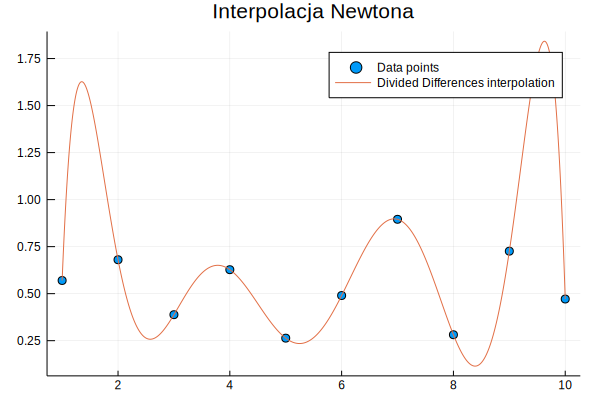

In [7]:
nF = dividedDifferencesFit(xs, A)
C=[nF(x) for x in xsf]
scatter(xs,A, label="Data points", title="Dane testowe")
plot!(xsf,C, label="Divided Differences interpolation", title="Interpolacja Newtona")

## Zadanie 2

Porównanie interpolacji wielomianowej na jednym wykresie:
- wielomian interpolacyjny Lagrange'a 
- metoda ilorazów róznicowych
- interpolacja wielomianową z pakietu Polynomials


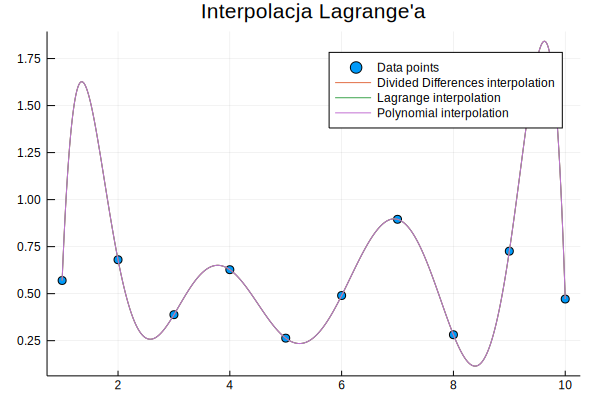

In [8]:
pF=polyfit(xs, A)
D=[pF(x) for x in xsf]
scatter(xs,A, label="Data points", title="Dane testowe")
plot!(xsf,C, label="Divided Differences interpolation", title="Interpolacja Newtona")
plot!(xsf,B, label="Lagrange interpolation", title="Interpolacja Lagrange'a")
plot!(xsf,D, label="Polynomial interpolation")

### Jednoznaczność rozwiązania
Rozwiązania są identyczne dla różnych metod, ponieważ z Twierdzenia o jednoznacznosci rozwiązania wynika, że istnieje dokładnie jeden wielomian $P_n(x)$ stopnia $\leq n$, przechodzący przez $n$ punktów.

## Zadanie 4
Porownanie metod poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji.

In [9]:
dfJulia=DataFrame(Method=String[],Nodes=Int64[],Time=Float64[])
for i=collect(10:10:1000)
    for j=1:10
        xs = 1:1:i
        A = [rand() for x in xs]
        push!(dfJulia,["lagrange", i, (@elapsed lagrangeFit(xs, A))])
        push!(dfJulia,["divdiff", i, (@elapsed dividedDifferencesFit(xs, A))])
        push!(dfJulia,["polyfit", i, (@elapsed polyfit(xs, A))])
    end
end
dfJulia

,Method,Nodes,Time
,String,Int64,Float64
1,lagrange,10,4.577e-6
2,divdiff,10,6.99e-6
3,polyfit,10,1.6396e-5
4,lagrange,10,1.448e-6
5,divdiff,10,1.215e-6
6,polyfit,10,4.763e-6
7,lagrange,10,4.77e-7
8,divdiff,10,9.62e-7
9,polyfit,10,3.466e-6


In [10]:
dfDataJulia=by(dfJulia,:Method) do part1
    by(part1,:Nodes) do part2
        DataFrame(
            Mean=mean(part2[:Time]),
            Std=std(part2[:Time])
        )
    end
end

,Method,Nodes,Mean,Std
,String,Int64,Float64,Float64
1,lagrange,10,9.118e-7,1.33117e-6
2,lagrange,20,2.0659e-6,4.78063e-7
3,lagrange,30,1.7537e-6,1.07516e-7
4,lagrange,40,1.2047e-6,6.97074e-8
5,lagrange,50,8.473e-7,3.43922e-7
6,lagrange,60,6.549e-7,4.29067e-8
7,lagrange,70,6.639e-7,4.9912e-8
8,lagrange,80,7.032e-7,6.44546e-8
9,lagrange,90,7.639e-7,9.52499e-8


Wykres czasu obliczenia funkcji interpolującej w zależności od liczby węzłów interpolacji

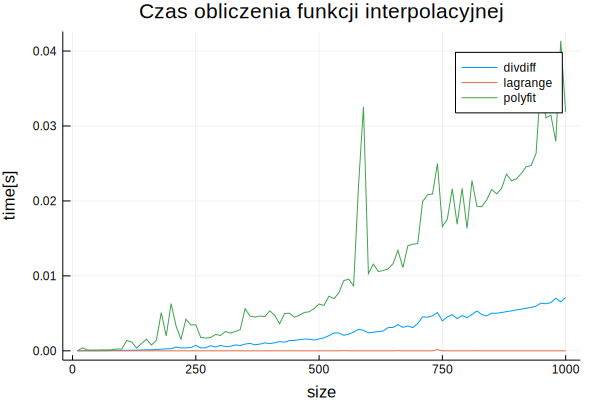

In [11]:
plot(dfDataJulia[:Nodes],dfDataJulia[:Mean], group=dfDataJulia[:Method],
    xlabel="size",ylabel="time[s]",title="Czas obliczenia funkcji interpolacyjnej")

Na wykresie widać, że metoda Lagrangea nie dokonuje żadnych początkowych obliczeń. Metoda Newtona oblicza część początkowych wartości. Natomiast wbudowana funckja polyfit dokonuje bardzo wielu obliczeń po wywołaniu i działa dosyć nieregularnie.

In [12]:
dfJulia=DataFrame(Method=String[],Nodes=Int64[],Time=Float64[])
for i=collect(10:10:1000)
    for j=1:10
        xs = 1:1:i
        A = [rand() for x in xs]
        lF = lagrangeFit(xs, A)
        dF = dividedDifferencesFit(xs,A)
        pF = polyfit(xs, A)
        push!(dfJulia,["lagrange", i, (@elapsed lF(i))])
        push!(dfJulia,["divdiff", i, (@elapsed dF(i))])
        push!(dfJulia,["polyfit", i, (@elapsed pF(i))])
    end
end
dfJulia

,Method,Nodes,Time
,String,Int64,Float64
1,lagrange,10,0.045179
2,divdiff,10,0.0296162
3,polyfit,10,0.0164106
4,lagrange,10,2.219e-6
5,divdiff,10,1.782e-6
6,polyfit,10,1.189e-6
7,lagrange,10,9.28e-7
8,divdiff,10,4.37e-7
9,polyfit,10,3.35e-7


In [13]:
dfDataJulia=by(dfJulia,:Method) do part1
    by(part1,:Nodes) do part2
        DataFrame(
            Mean=mean(part2[:Time]),
            Std=std(part2[:Time])
        )
    end
end

,Method,Nodes,Mean,Std
,String,Int64,Float64,Float64
1,lagrange,10,0.00451873,0.0142866
2,lagrange,20,4.5635e-6,4.38489e-6
3,lagrange,30,6.4534e-6,1.50676e-7
4,lagrange,40,1.0612e-5,1.02535e-7
5,lagrange,50,1.57613e-5,9.27195e-8
6,lagrange,60,2.18258e-5,1.01665e-7
7,lagrange,70,2.89535e-5,7.37929e-8
8,lagrange,80,3.72037e-5,8.74605e-8
9,lagrange,90,4.64176e-5,6.48026e-8


Wykres czasu obliczenia interpolacji punktu dla obliczonej już funkcji w zależności od liczby węzłów interpolacji

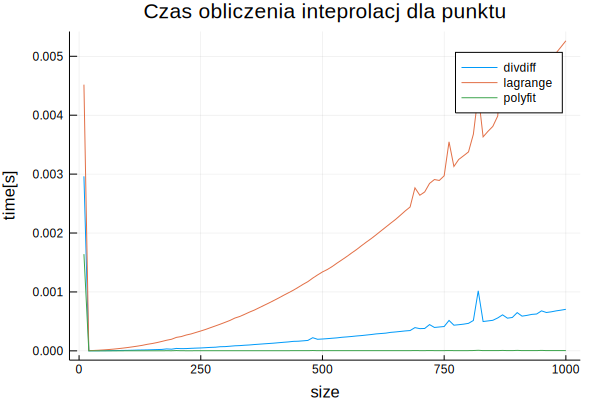

In [14]:
plot(dfDataJulia[:Nodes],dfDataJulia[:Mean], group=dfDataJulia[:Method],
    xlabel="size",ylabel="time[s]",title="Czas obliczenia inteprolacj dla punktu")

Metoda Lagrange'a wszystkie obliczenia wykonuje dla konkretnego punktu, dlatego tym razem trwa zdecydowanie nadłużej, i bardzo szybko rośnie. Metoda Newtona po obliczeniu części początkowych wartości dokonuje pozostałych obliczeń. Natomiast wbudowana funckja polyfit dokonuje obliczenia w czasie jednostkowym.

In [15]:
dfJulia=DataFrame(Method=String[],Nodes=Int64[],Time=Float64[])
for i=collect(10:10:1000)
    for j=1:10
        xs = 1:1:i
        A = [rand() for x in xs]
        push!(dfJulia,["lagrange", i, (@elapsed lagrangeFit(xs, A)(1))])
        push!(dfJulia,["divdiff", i, (@elapsed dividedDifferencesFit(xs, A)(1))])
        push!(dfJulia,["polyfit", i, (@elapsed polyfit(xs, A)(1))])
    end
end
dfJulia

,Method,Nodes,Time
,String,Int64,Float64
1,lagrange,10,7.902e-6
2,divdiff,10,6.067e-6
3,polyfit,10,2.0723e-5
4,lagrange,10,1.598e-6
5,divdiff,10,1.633e-6
6,polyfit,10,4.471e-6
7,lagrange,10,1.239e-6
8,divdiff,10,1.056e-6
9,polyfit,10,3.509e-6


In [16]:
dfDataJulia=by(dfJulia,:Method) do part1
    by(part1,:Nodes) do part2
        DataFrame(
            Mean=mean(part2[:Time]),
            Std=std(part2[:Time])
        )
    end
end

,Method,Nodes,Mean,Std
,String,Int64,Float64,Float64
1,lagrange,10,1.7459e-6,2.17316e-6
2,lagrange,20,3.4386e-6,3.20993e-7
3,lagrange,30,7.0179e-6,8.33073e-8
4,lagrange,40,1.12685e-5,1.10406e-7
5,lagrange,50,1.65856e-5,4.01364e-8
6,lagrange,60,2.29693e-5,1.06203e-7
7,lagrange,70,3.03356e-5,9.68185e-8
8,lagrange,80,3.88392e-5,1.10647e-7
9,lagrange,90,4.85769e-5,1.39102e-7


Wykres czasu obliczenia funkcji interpolacyjnej i obliczenie inteprolacji dla jednego punktu różnymi metodami

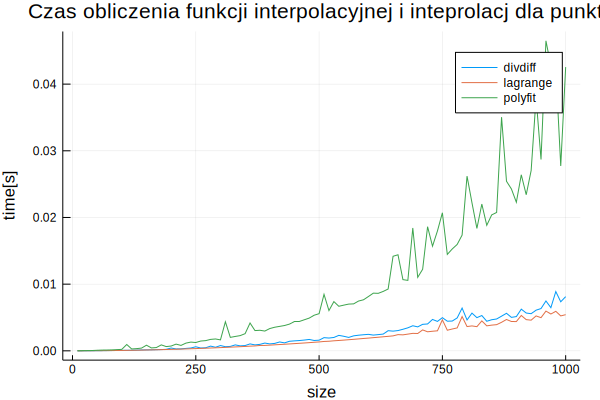

In [17]:
plot(dfDataJulia[:Nodes],dfDataJulia[:Mean], group=dfDataJulia[:Method],
    xlabel="size",ylabel="time[s]",title="Czas obliczenia funkcji interpolacyjnej i inteprolacj dla punktu")

Na wykresie widać, że metoda Lagrangea działa najszybciej, natomiast metoda Newtona jest tylko niewiele wolniejsza. Wbudowana funckja polyfit działa zdecydowanie wolniej i dosyć nieregularnie.

### Wnioski

Jak widać, wybór metody ma istotny wpływ na czas obliczeń i powinien zależeć od tego, jak dużo będziemy obliczać wartości funkcji dla innych punktów. W przypadku obliczenia jednej wartości najlepsza jest metoda Lagrange'a. Jesli tych wartości jest więcej to lepiej sprawdzi się metoda Newtona która dokonuje części wspólnych obliczeń dla różnych punktów przy wyznaczaniu funkcji. Natomiast wpudowana funkcja polyfit dokonuje mozolnych obliczeń wzoru funkcji, ale później bardzo szybko zwraca wynik dla punktów. Dlatego sprawdzi się w sytuacjach, kiedy funckja jest czesto używana.

### Obliczenia symboliczne w Julii

Udało mi się również dokonać inteprpolacji Lagrange'a przy pomocy obliczeń symbolicznych dostepnych w Julii, ale czas ewaluacji powodwał że metoda była aż 100 krotnie wolniejsza.

## Zadanie 5
Interpolacja funkcjami sklejanymi

Porównianie interpolacji funkcjami sklejanymi. Interpolacja liniowa, kwadratowa i kubiczna w porównaniu do interpolacji wielomianami

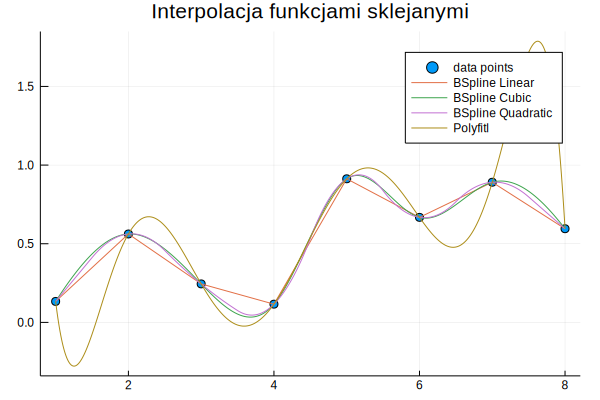

In [18]:
size = 8

xs = 1:1:size
xsf = 1:0.01:size
A = [rand() for x in xs]

scatter(xs,A, label="data points", title="Interpolacja funkcjami sklejanymi")

itp = interpolate(A, BSpline(Linear()))
B=[itp(x) for x in xsf]
plot!(xsf,B, label="BSpline Linear")

itp = interpolate(A, BSpline(Cubic(Natural(OnCell()))))
B=[itp(x) for x in xsf]
plot!(xsf,B, label="BSpline Cubic")

itp = interpolate(A, BSpline(Quadratic(Natural(OnCell()))))
B=[itp(x) for x in xsf]
plot!(xsf,B, label="BSpline Quadratic")

pf = polyfit(xs,A)
B=[pf(x) for x in xsf]
plot!(xsf,B, label="Polyfitl")

Porównanie interpolacji kubiczna dla różnych waruneków brzegowych oraz różnych punktów siatki do których te warunki brzegowe są stosowane

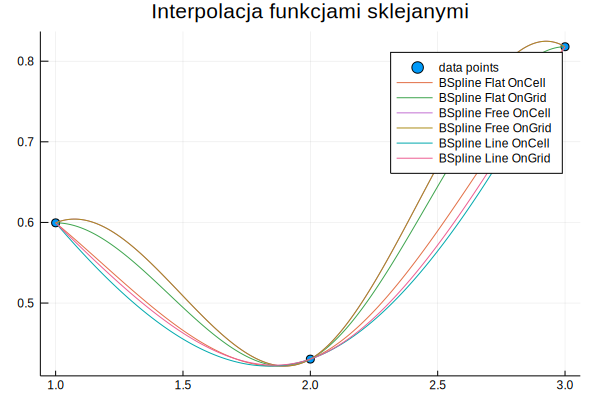

In [19]:
size = 3

xs = 1:1:size
xsf = 1:0.01:size
A = [rand() for x in xs]

scatter(xs,A, label="data points", title="Interpolacja funkcjami sklejanymi")

itp = interpolate(A, BSpline(Cubic(Flat(OnCell()))))
B=[itp(x) for x in xsf]
plot!(xsf,B, label="BSpline Flat OnCell")

itp = interpolate(A, BSpline(Cubic(Flat(OnGrid()))))
B=[itp(x) for x in xsf]
plot!(xsf,B, label="BSpline Flat OnGrid")

itp = interpolate(A, BSpline(Cubic(Free(OnCell()))))
B=[itp(x) for x in xsf]
plot!(xsf,B, label="BSpline Free OnCell")

itp = interpolate(A, BSpline(Cubic(Free(OnGrid()))))
B=[itp(x) for x in xsf]
plot!(xsf,B, label="BSpline Free OnGrid")

itp = interpolate(A, BSpline(Cubic(Line(OnCell()))))
B=[itp(x) for x in xsf]
plot!(xsf,B, label="BSpline Line OnCell")

itp = interpolate(A, BSpline(Cubic(Line(OnGrid()))))
B=[itp(x) for x in xsf]
plot!(xsf,B, label="BSpline Line OnGrid")




## Zdanie 6
Demonstracja efektu Rungego

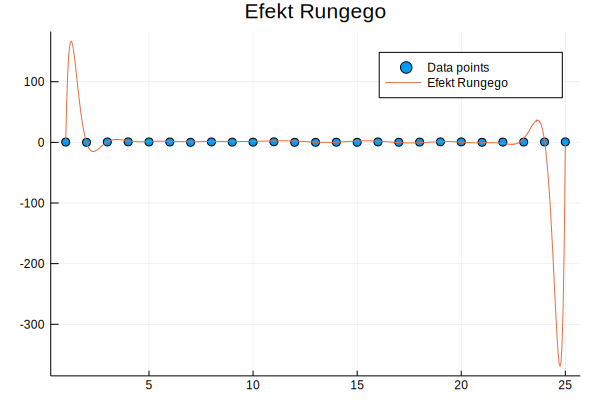

In [58]:
xs = 1:1:25
xsf=1:0.01:25
A = [rand() for x in xs]
scatter(xs,A, label="Data points               ", title="Efekt Rungego")
pF=polyfit(xs, A)
D=[pF(x) for x in xsf]
plot!(xsf,D, label="Efekt Rungego             ")

## Zdanie 7
Algorytmy interpolacji stosowane w grafice komputerowej do zmiany wielkości obrazu

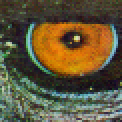

In [105]:
img = testimage("mandrill")
# select a region-of-interest from a larger image
imgc = img[40:100, 140:200]        # makes a copy
# an image that starts black in the upper left and gets bright in the lower right:

In [106]:
typeof(imgc)

Array{RGB{Normed{UInt8,8}},2}

### Interpolacja metodą najbliższego sąsiada

Polega na wiernym kopiowaniu sąsiednich pikseli

In [107]:
function resizeNearest(img,num)
    sizeX=length(img[:,1])*num
    sizeY=length(img[1,:])*num
    
    newImg = fill(RGB{Normed{UInt8,8}}(0,0,0), sizeX, sizeY)

    for x in 1:sizeX
        for y in 1:sizeY
            newImg[x,y]=img[div(x-1,num)+1,div(y-1,num)+1];
        end
    end
    newImg
end

resizeNearest (generic function with 1 method)

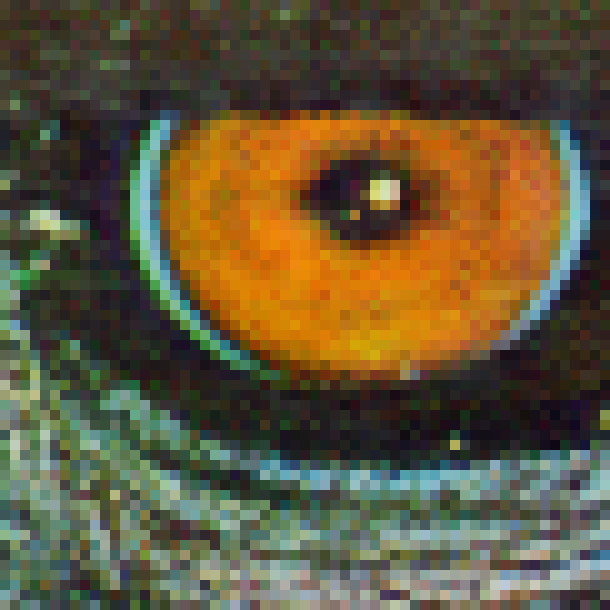

In [108]:
resizeNearest(imgc,10)

### Interpolacja dwuliniowa

Kolor piksela jest obliczony na podstawie czterech sąsiednich pikseli, stykających się bokami.

In [90]:
function resizeBilinear(img,num)
    sizeX=length(img[:,1])*num
    sizeY=length(img[1,:])*num
    
    newImg = fill(RGB{Normed{UInt8,8}}(0,0,0), sizeX, sizeY)

    for x in 1:sizeX        
        
        leftX = floor(Int64,(x-1)/(sizeX-1)*(sizeX/num-1))+1
        rightX = ceil(Int64,(x-1)/(sizeX-1)*(sizeX/num-1))+1
        ratioX = 1-Normed{UInt8,8}((x-1)/(sizeX-1)*(sizeX/num-1)+1-leftX)    
        
        for y in 1:sizeY
            
            leftY = floor(Int64,(y-1)/(sizeY-1)*(sizeY/num-1))+1
            rightY = ceil(Int64,(y-1)/(sizeY-1)*(sizeY/num-1))+1
            
            leftRef = ratioX*img[leftX,leftY] + (1-ratioX)*img[rightX,leftY]
            rightRef = ratioX*img[leftX,rightY] + (1-ratioX)*img[rightX,rightY]
            
            ratioY = 1- Normed{UInt8,8}((y-1)/(sizeY-1)*(sizeY/num-1)+1-leftY) 
        
            newImg[x,y] = ratioY*leftRef + (1-ratioY)*rightRef

        end
    end
    newImg
end

resizeBilinear (generic function with 1 method)

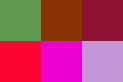

In [91]:
img = rand(RGB{Normed{UInt8,8}},2,3)
img

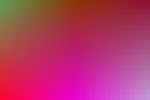

In [92]:
resizeBilinear(img,10)

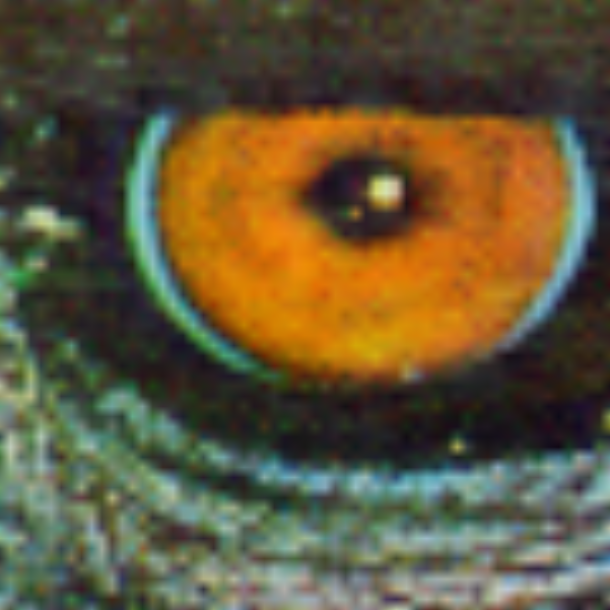

In [109]:
resizeBilinear(imgc,10)